# Named Entity Recognition (NER) in Python with Spacy

In [ ]:
# Step 1: Import SpaCy and load the NER model
import spacy
from spacy import displacy

In [ ]:
# Load the small English NLP model, which includes an NER component
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Step 2: Define the text for analysis
text = """The Indian Space Research Organisation, or ISRO, is the national space agency of India, headquartered in Bengaluru.
           It operates under the Department of Space, which is directly overseen by the Prime Minister of India,
           while the Chairman of ISRO acts as executive of DOS."""

In [ ]:
# Step 3: Process the text to extract entities
doc = nlp(text)

In [ ]:
# Step 4: Print each named entity with its label
print("Extracted Named Entities and their Labels:\n")
for ent in doc.ents:
    print(ent.text, "-", ent.label_)

Extracted Named Entities and their Labels:

The Indian Space Research Organisation - ORG
India - GPE
Bengaluru - GPE
the Department of Space - ORG
India - GPE
ISRO - ORG
DOS - ORG


In [ ]:
# Step 5: Explain some common entity labels
print("\nLabel Descriptions:")
print("ORG:", spacy.explain("ORG"))
print("GPE:", spacy.explain("GPE"))


Label Descriptions:
ORG: Companies, agencies, institutions, etc.
GPE: Countries, cities, states


In [ ]:
# Step 6: Visualize named entities in text using displacy
displacy.render(doc, style="ent", jupyter=True)  # If in Jupyter notebook, use jupyter=True


In [ ]:
from bs4 import BeautifulSoup
import requests
import re

# Step 1: Fetch and clean text from a URL
url = "https://www.zeebiz.com/markets/currency/news-cryptocurrency-news-today-june-12-bitcoin-dogecoin-shiba-inu-and-other-top-coins-prices-and-all-latest-updates-158490"
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "lxml")
text = soup.body.get_text()

# Step 2: Clean up the text
text = re.sub(r'\s+', ' ', text)  # Remove unnecessary whitespace and line breaks

# Step 3: Process text and extract entities
doc = nlp(text)
displacy.render(doc, style="ent", jupyter=True)


# Named Entity Recognition (NER) with BERT

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
import matplotlib.pyplot as plt

In [ ]:
# Load the BERT tokenizer and pre-trained model
model_name = "dbmdz/bert-large-cased-finetuned-conll03-english"  # Example NER model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Define the NER pipeline
nlp = pipeline("ner", model=model, tokenizer=tokenizer)

In [ ]:
# New text for NER
text = (
    "The United Nations held a conference in New York to address climate change, "
    "with representatives from countries like Canada, Brazil, and India participating. "
    "Secretary-General António Guterres emphasized the need for immediate action to combat global warming."
)

In [ ]:
# Perform NER on the text
ner_results = nlp(text)

In [ ]:
# Display the raw NER results
for entity in ner_results:
    print(f"Entity: {entity['word']}, Label: {entity['entity']}")

Entity: United, Label: I-ORG
Entity: Nations, Label: I-ORG
Entity: New, Label: I-LOC
Entity: York, Label: I-LOC
Entity: Canada, Label: I-LOC
Entity: Brazil, Label: I-LOC
Entity: India, Label: I-LOC
Entity: An, Label: I-PER
Entity: ##t, Label: I-PER
Entity: ##ón, Label: I-PER
Entity: ##io, Label: I-PER
Entity: G, Label: I-PER
Entity: ##uter, Label: I-PER
Entity: ##res, Label: I-PER


In [ ]:
# Visualize the NER results
entities = [entity['word'] for entity in ner_results]
labels = [entity['entity'] for entity in ner_results]

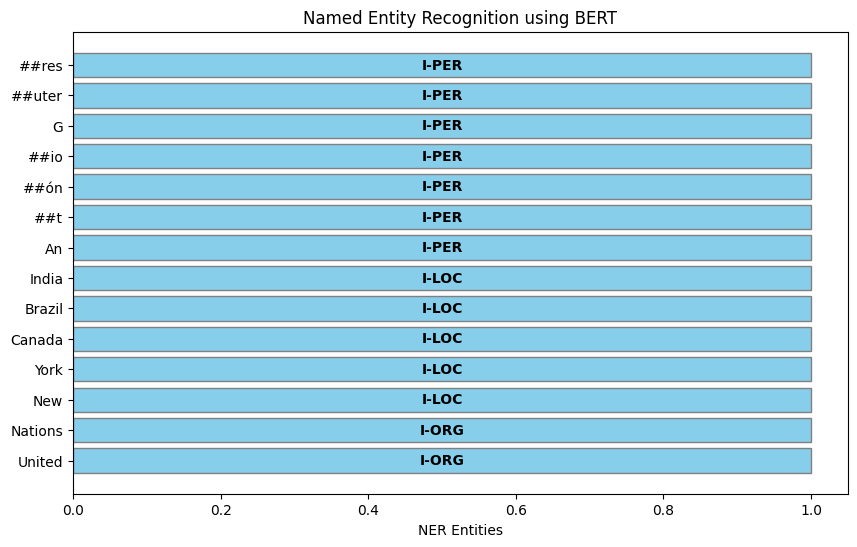

In [ ]:
# Plotting the NER results using matplotlib
plt.figure(figsize=(10, 6))
plt.barh(entities, [1]*len(entities), color='skyblue', edgecolor='grey')
plt.yticks(range(len(entities)), entities)
for i, label in enumerate(labels):
    plt.text(0.5, i, label, va='center', ha='center', color='black', fontweight='bold')
plt.xlabel("NER Entities")
plt.title("Named Entity Recognition using BERT")
plt.show()


# Named Entity Recognition (NER) with NLTK

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

In [ ]:
# Download the 'punkt' resource for tokenization
nltk.download('punkt')
# Download the required resource
nltk.download('averaged_perceptron_tagger')
# Download the necessary NLTK data package
nltk.download('maxent_ne_chunker')
# Download the 'words' resource
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
# Sample text paragraph
text = (
    "On December 15, 2022, NASA launched the James Webb Space Telescope to explore the universe's oldest galaxies. "
    "The mission, led by NASA Administrator Bill Nelson, aims to provide unprecedented views of distant stars and planets. "
    "This telescope, built by Northrop Grumman, is considered one of the most ambitious projects in space exploration. "
    "The launch took place from the Kennedy Space Center in Florida, where thousands of spectators gathered to witness the event. "
    "Scientists around the world are excited about the possibilities this new technology will bring."
)

In [ ]:
# Function to preprocess the text
def preprocess(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Perform part-of-speech tagging
    pos_tags = pos_tag(tokens)
    return pos_tags

In [ ]:
# Preprocess the text
sent = preprocess(text)

In [ ]:
# Perform Named Entity Recognition
ne_tree = ne_chunk(sent)

In [ ]:
# Print the resulting NER tree
print(ne_tree)

(S
  On/IN
  December/NNP
  15/CD
  ,/,
  2022/CD
  ,/,
  (ORGANIZATION NASA/NNP)
  launched/VBD
  the/DT
  (PERSON James/NNP Webb/NNP Space/NNP Telescope/NNP)
  to/TO
  explore/VB
  the/DT
  universe/NN
  's/POS
  oldest/JJS
  galaxies/NNS
  ./.
  The/DT
  mission/NN
  ,/,
  led/VBN
  by/IN
  (ORGANIZATION NASA/NNP)
  Administrator/NNP
  (PERSON Bill/NNP Nelson/NNP)
  ,/,
  aims/VBZ
  to/TO
  provide/VB
  unprecedented/JJ
  views/NNS
  of/IN
  distant/JJ
  stars/NNS
  and/CC
  planets/NNS
  ./.
  This/DT
  telescope/NN
  ,/,
  built/VBN
  by/IN
  (ORGANIZATION Northrop/NNP Grumman/NNP)
  ,/,
  is/VBZ
  considered/VBN
  one/CD
  of/IN
  the/DT
  most/RBS
  ambitious/JJ
  projects/NNS
  in/IN
  space/NN
  exploration/NN
  ./.
  The/DT
  launch/NN
  took/VBD
  place/NN
  from/IN
  the/DT
  (FACILITY Kennedy/NNP Space/NNP Center/NNP)
  in/IN
  (GPE Florida/NNP)
  ,/,
  where/WRB
  thousands/NNS
  of/IN
  spectators/NNS
  gathered/VBN
  to/TO
  witness/VB
  the/DT
  event/NN
  ./.
  Scient

In [ ]:
# Optionally, to visualize the NER tree
nltk.download('treebank')
from nltk import Tree
def visualize_ne_tree(ne_tree):
    Tree.fromstring(str(ne_tree)).pretty_print()

visualize_ne_tree(ne_tree)


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


                                                                                                                                                                                                                                                                                                                                                                                                                                     S                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
   ___________________________________________________________________________

# Named Entity Recognition (NER) with Flair

In [ ]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.5/776.5 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 4.9 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=2c3e98f4659a58ff528fabe9788e64951f042c7f0aebc505dc6133b1b69999a9
  Stored in directory: /root/.cache

In [ ]:
# Import necessary libraries
from flair.data import Sentence
from flair.models import SequenceTagger

In [ ]:
# New sample text paragraph
text = (
    "Apple Inc. announced the release of its latest iPhone model during a press event in Cupertino on September 12, 2023. "
    "CEO Tim Cook presented the features of the device, highlighting improvements in camera technology and battery life. "
    "The new iPhone will be available for pre-order starting September 15, with delivery expected by the end of the month. "
    "Analysts predict that this launch will significantly impact Apple's market share and sales figures for the holiday season."
)

In [ ]:
# Load the NER tagger
tagger = SequenceTagger.load('ner')

pytorch_model.bin:   0%|          | 0.00/419M [00:00<?, ?B/s]

2024-10-25 09:51:26,236 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>


In [ ]:
# Create a Sentence object
sentence = Sentence(text)

In [ ]:
# Predict entities in the sentence
tagger.predict(sentence)

In [ ]:
# Print the result
print(sentence)

Sentence[84]: "Apple Inc. announced the release of its latest iPhone model during a press event in Cupertino on September 12, 2023. CEO Tim Cook presented the features of the device, highlighting improvements in camera technology and battery life. The new iPhone will be available for pre-order starting September 15, with delivery expected by the end of the month. Analysts predict that this launch will significantly impact Apple's market share and sales figures for the holiday season." → ["Apple Inc"/ORG, "iPhone"/MISC, "Cupertino"/LOC, "Tim Cook"/PER, "iPhone"/MISC, "Apple"/ORG]


In [ ]:
# Optionally, visualize the entities
for entity in sentence.get_spans('ner'):
    print(f"Entity: {entity.text}, Type: {entity.get_label('ner').value}, Score: {entity.score:.4f}")


Entity: Apple Inc, Type: ORG, Score: 0.9998
Entity: iPhone, Type: MISC, Score: 0.7404
Entity: Cupertino, Type: LOC, Score: 0.9999
Entity: Tim Cook, Type: PER, Score: 0.9989
Entity: iPhone, Type: MISC, Score: 0.9686
Entity: Apple, Type: ORG, Score: 0.9939
